# Praca domowa nr 3
## Autor: Mariusz Słapek
## Data: 06.04.2020

In [38]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

### Data

In [15]:
data = pd.read_csv("./australia.csv")

In [16]:
data.sample(4)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
24866,10.3,13.9,3.2,4.4,4.2,50.0,22.0,26.0,80.0,70.0,999.9,997.7,7.0,6.0,11.7,12.6,1,1
11122,10.1,31.8,0.0,8.6,12.3,39.0,13.0,13.0,52.0,19.0,1020.9,1017.6,1.0,5.0,19.8,30.1,0,0
8634,13.8,21.9,0.0,5.4,13.3,35.0,13.0,22.0,65.0,50.0,1027.5,1024.9,1.0,1.0,18.3,21.6,0,0
2920,14.2,31.0,0.0,7.8,12.9,33.0,6.0,7.0,64.0,22.0,1013.6,1011.8,1.0,1.0,22.4,29.6,0,0


In [30]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,0.220879,0.220259
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,0.414843,0.414425
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000,0.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000,0.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.000000,0.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustSpeed  56420 non-null  float64
 6   WindSpeed9am   56420 non-null  float64
 7   WindSpeed3pm   56420 non-null  float64
 8   Humidity9am    56420 non-null  float64
 9   Humidity3pm    56420 non-null  float64
 10  Pressure9am    56420 non-null  float64
 11  Pressure3pm    56420 non-null  float64
 12  Cloud9am       56420 non-null  float64
 13  Cloud3pm       56420 non-null  float64
 14  Temp9am        56420 non-null  float64
 15  Temp3pm        56420 non-null  float64
 16  RainToday      56420 non-null  int64  
 17  RainTomorrow   56420 non-null  int64  
dtypes: flo

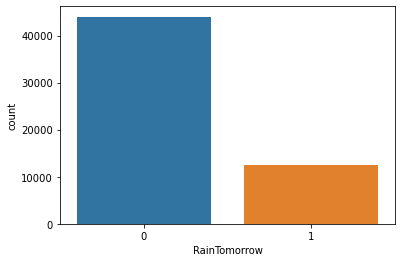

In [36]:
sns.countplot(x = "RainTomorrow", data=data)

## Test/train set

In [19]:
y = np.array(data.RainTomorrow)
X = data.drop(['RainTomorrow'], axis=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 124)

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45136, 17) (11284, 17) (45136,) (11284,)


#### Tests

In [32]:
assert len(X_train) == 0.8 * len(data)
assert len(y_train) == 0.8 * len(data)
assert len(X_test) == 0.2 * len(data)
assert len(y_test) == 0.2 * len(data)

## Metryki

In [123]:
#! pip install --user plot-metric

In [124]:
from sklearn.metrics import (accuracy_score, 
                             f1_score, 
                             roc_auc_score, 
                             precision_score,
                             recall_score, 
                             roc_curve)

Wybrałem następujące metryki:
- roc_auc_score
- f1_score
- precision_score, recall_score (które są ściśle związane z f1_scorem)

## Algorytmy

### Algorytm 1 - Logistic regression

#### Parametry:

- penalty: default='l2' 
- solver: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’    
    (For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.)
- max_iter: int
    (Maximum number of iterations taken for the solvers to converge.)
- C: regularization

In [114]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, penalty='l2', solver='liblinear', C=0.9)

model = lr.fit(X_train, y_train)
lr_pred = model.predict(X_test)
lr_proba = model.predict_proba(X_test)[:, 1]

### Algorytm 2 - MLPClassifier

- activation: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’  
    (‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x))
- solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’

In [115]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 10, 15), solver='adam')
model = mlp.fit(X_train, y_train)

mlp_pred = model.predict(X_test)
mlp_proba = model.predict_proba(X_test)[:, 1]

### Algorytm 3 - LightGBM

- learning_rate (float, optional (default=0.1)) – Boosting learning rate. You can use callbacks parameter of fit method to shrink/adapt learning rate in training using reset_parameter callback. Note, that this will ignore the learning_rate argument in training.
- n_estimators (int, optional (default=100)) – Number of boosted trees to fit.
- boosting_type (string, optional (default='gbdt')) – ‘gbdt’, traditional Gradient Boosting Decision Tree. ‘dart’, Dropouts meet Multiple Additive Regression Trees. ‘goss’, Gradient-based One-Side Sampling. ‘rf’, Random Forest.

In [116]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(boosting_type='goss', learning_rate=0.05, n_estimators=200)
model = lgbm.fit(X_train, y_train)

lgbm_pred = model.predict(X_test)
lgbm_proba = model.predict_proba(X_test)[:, 1]

## Ewaluacja modeli

### F1-score

#### Logistic regression

In [72]:
f1_score(y_test, lr_pred)

0.6027000964320155

#### MLPClassifier

In [75]:
f1_score(y_test, mlp_pred)

0.6355601233299075

#### LightGBM

In [104]:
f1_score(y_test, lgbm_pred)

0.6245831348261076

### Precision/Recall

#### Logistic regression

In [53]:
recall_score(y_test, lr_pred)

0.5150391429748661

In [68]:
precision_score(y_test, lr_pred)

0.726321905868681

#### MLPClassifier

In [76]:
recall_score(y_test, mlp_pred)

0.6370004120313144

In [77]:
precision_score(y_test, mlp_pred)

0.6341263330598852

#### LightGMB

In [106]:
recall_score(y_test, lgbm_pred)

0.5401730531520396

In [107]:
precision_score(y_test, lgbm_pred)

0.7402597402597403

### ROC

#### Logistic regression

In [146]:
roc_auc_score(y_test, lr_proba)

0.8768339452396101

#### MLPClassifier

In [144]:
roc_auc_score(y_test, mlp_proba)

0.8708168552208861

#### LigthGBM

In [145]:
roc_auc_score(y_test, lgbm_proba)

0.8902183337978398

### ROC curve

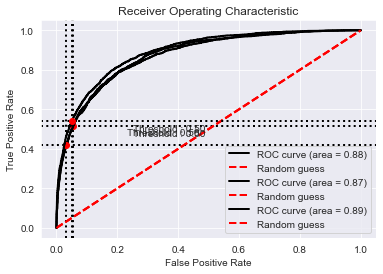

In [139]:
from plot_metric.functions import BinaryClassification
lr_plot = BinaryClassification(y_test, lr_proba, labels=["Class 1", "Class 2"])
mlp_plot = BinaryClassification(y_test, mlp_proba, labels=["Class 1", "Class 2"])
lgbm_plot = BinaryClassification(y_test, lgbm_proba, labels=["Class 1", "Class 2"])

plt.figure()
# Figures
lr_plot.plot_roc_curve()
mlp_plot.plot_roc_curve()
lgbm_plot.plot_roc_curve()
plt.show()

## Wnioski

Wyniki przez wybrane trzy algorytmy są bardzo podobne. Wartości *auc* są podobne: *LGBM* ma najwyższą wartość. 

Sprawdzając parametry w literaturze dowaidujemy się, iż wyniki osiągnięte przez modele są bardzo dobre. Można je jeszcze starać się polepszyć poprzez lepsze strojenie parametrów

# Bonus

In [250]:
bonus_data = pd.read_csv("https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1")

In [251]:
y = bonus_data.price
X = bonus_data

In [252]:
bonus_data.head(2)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"


In [253]:
bonus_data=bonus_data.drop(["lp", "date", "item_id"], axis=1)

In [254]:
bonus_data.head(1)

,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery


In [255]:
X = bonus_data.drop('price', axis=1)
y = bonus_data['price']

In [256]:
X.head(3)

,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,0,50177,Warszawa,Komputery
1,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,0,7389,Leszno,Dom i Ogród


In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [258]:
cols = ['categories', 'seller', 'it_location', 'main_category']

## Target encoding

In [259]:
from category_encoders.target_encoder import TargetEncoder

te_X_train, te_y_train, te_X_test, te_y_test = X_train.copy(), y_train.copy(), X_test.copy(), y_test.copy()

te = TargetEncoder(cols=cols)
te_data_train = te.fit_transform(te_X_train, te_y_train)
te_data_test = te.transform(te_X_test, te_y_test)

## Binary encoder


In [260]:
from category_encoders.binary import BinaryEncoder

be_X_train, be_y_train, be_X_test, be_y_test = X_train.copy(), y_train.copy(), X_test.copy(), y_test.copy()

be = BinaryEncoder(cols=cols)
be_data_train = be.fit_transform(be_X_train, be_y_train)
be_data_test = be.transform(be_X_test, be_y_test)

## Base-N encoder

In [261]:
from category_encoders import BaseNEncoder

bn_X_train, bn_y_train, bn_X_test, bn_y_test = X_train.copy(), y_train.copy(), X_test.copy(), y_test.copy()

bn = BaseNEncoder(base=8, cols=cols)
bn_data_train =  bn.fit_transform(bn_X_train, bn_y_train)
bn_data_test =  bn.transform(bn_X_test, bn_y_test)

## Model - Linear Regression

In [262]:
from sklearn.linear_model import LinearRegression

# Target encoding
te_lr = LinearRegression() 
te_lr.fit(te_data_train, y_train)
te_pred = te_lr.predict(te_data_test)

# Binary encoder
be_lr = LinearRegression()
be_lr.fit(be_data_train, y_train)
be_pred = be_lr.predict(be_data_test)

# Base-N encoder
bn_lr = LinearRegression()
bn_lr.fit(bn_data_train, y_train)
bn_pred = bn_lr.predict(bn_data_test)

In [263]:
from sklearn.metrics import r2_score, mean_squared_error
print('r2: target encoding: ' + str(r2_score(y_test, te_pred)))
print('r2: binary encoding: ' + str(r2_score(y_test, be_pred)))
print('r2: base-n encoding: ' + str(r2_score(y_test, bn_pred)))

print('mean_squared_error: target encoding: ' + str(mean_squared_error(y_test, te_pred)))
print('mean_squared_error: binary encoding: ' + str(mean_squared_error(y_test, be_pred)))
print('mean_squared_error: base-n encoding: ' + str(mean_squared_error(y_test, bn_pred)))

r2: target encoding: 0.11186449885283656
r2: binary encoding: 0.003019318784959868
r2: base-n encoding: 0.004036443901221154
mean_squared_error: target encoding: 150552.4495952368
mean_squared_error: binary encoding: 169003.35991769016
mean_squared_error: base-n encoding: 168830.94177023385


## Wnioski

Najlepiej wypadł TargetEncoding. Pozostałe wypadły fatalnie - ale to też zgodne z intuicją, rzadko się z nich korzysta.